**Step-1**

**Import required packages**

- Package-1: Related to blob

  - pip install azure-storage-blob azure-identity

- Package-2: Related to Azure Document Intelligence serivce

  - pip install azure-ai-formrecognizer

**Step-2**

- Create Azure Document Intelligence service

- Go to azure portal 

- Search for Azure AI services

- Under that we have Document intelligence service

- Create Azure Document intelligence service

- Once you created , Go to service main page

- We need **keys and endpoint**

#### install the required packages

In [11]:
# !pip install azure-storage-blob azure-identity

In [12]:
# !pip install azure-ai-formrecognizer

In [13]:
doc_intelligence_key = "document-intelligence-key"
doc_intelligence_end_point = "https://.cognitiveservices.azure.com/" # endpoint

#### import libraries

In [14]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

credential = AzureKeyCredential(doc_intelligence_key)
document_analysis_client = DocumentAnalysisClient(doc_intelligence_end_point, credential)
document_analysis_client

**Step-3**

- Imagine the file is uploaded already in storage services

- Connect to the Container

- See your blob(or file avialable)

- Connect to blob and read the image

- Get blob url

In [15]:
from azure.storage.blob import BlobServiceClient
blob_account_url='https://windows.net'
storage_credential="your-blob-account-key"

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client

#### List all the containers from Blob storage

In [16]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'test-container', 'last_modified': datetime.datetime(2024, 12, 2, 3, 38, 12, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD1282BF8A9532"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000015FB0F3FEE0>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'user-upload-videos1', 'last_modified': datetime.datetime(2024, 11, 28, 8, 59, 49, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F8B0414BE60"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000015FB35A4250>, 'immutable_storage_wi

#### Download invoice locally

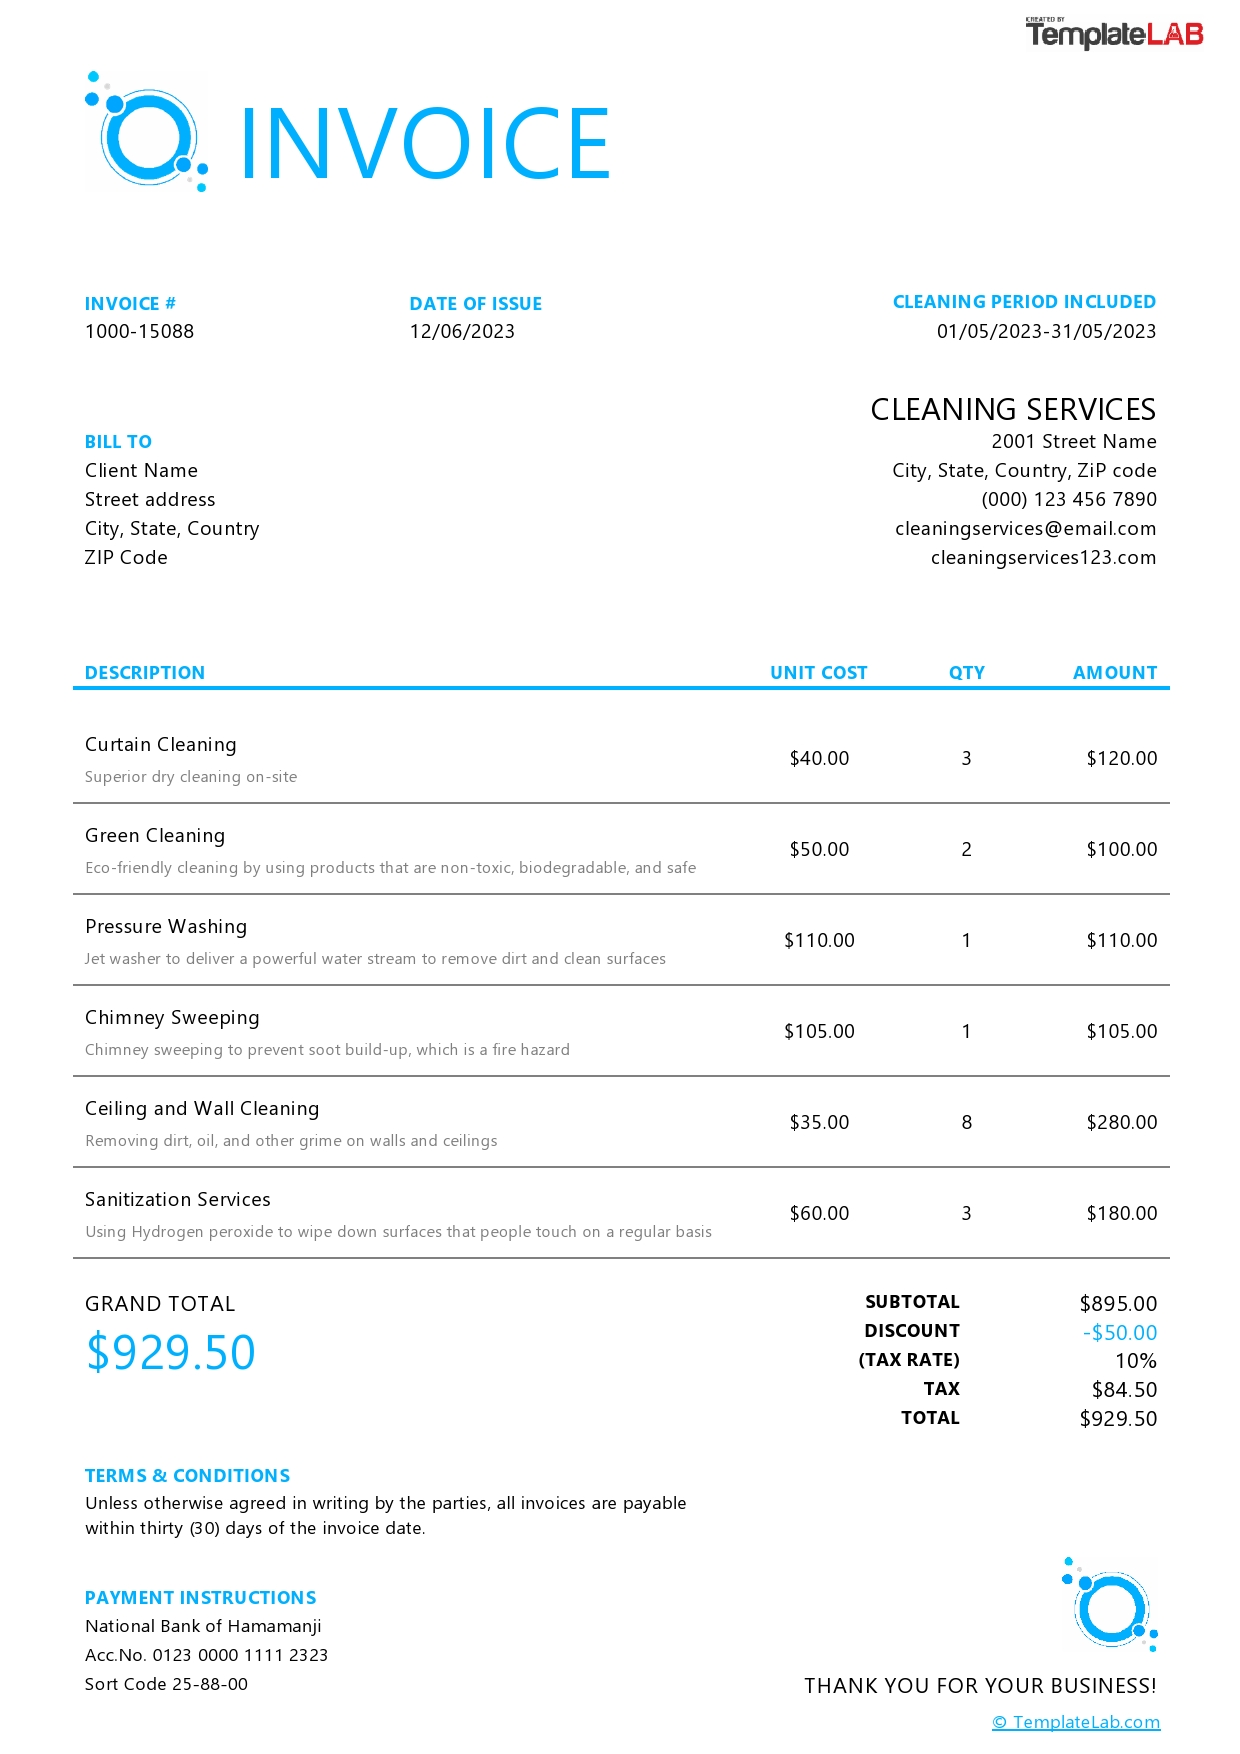

In [19]:
blob_client= blob_service_client.get_blob_client('test-container','invoice.jpg')
data=blob_client.download_blob()

from PIL import Image
image=Image.open(data)
image

## STEP -3

In [ ]:
# Initialize Blob Client
from azure.storage.blob import BlobClient
blob_account_url = "https://.blob.core.windows.net"
storage_credential="your-storage-account-key"
blob_url = "your-blob-url"

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# Download the image invoice from Azure Storage
with open("invoice_image.jpg", "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

    # Print out the extracted data
    for idx, invoice in enumerate(result.documents):
        print(f"============Recognise Invoice: {idx + 1}===================")
        #for name, field in invoice.fields.items():
            #print(f"{name}: {field.value}")
        for i in invoice.fields:
            print(i)
            print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
CustomerId
CustomerId:0123 0000 1111 2323
InvoiceDate
InvoiceDate:2023-06-12
InvoiceId
InvoiceId:1000-15088
InvoiceTotal
InvoiceTotal:$929.5
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=120.0, symbol=$, code=USD), content=$120.00, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=1086.0, y=748.0), Point(x=1156.0, y=747.0), Point(x=1156.0, y=768.0), Point(x=1086.0, y=769.0)])], spans=[DocumentSpan(offset=418, length=7)], confidence=0.957), 'Description': DocumentField(value_type=string, value='Curtain Cleaning\nSuperior dry cleaning on-site', content=Curtain Cleaning
Superior dry cleaning on-site, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=84.0, y=734.0), Point(x=298.0, y=734.0), Point(x=298.0, y=787.0), Point(x=84.0, y=787.0)])], spans=[DocumentSpan(offset=362, length=46)], confidence=0.954), 'Quantity': DocumentFie

In [23]:
# Invoice Data Extraction from Azure Document Intelligence - Extracting Line Items and Amounts
# This code downloads an invoice image from Azure Blob Storage and extracts item details using Azure's docs intelligence

# Loop through each document recognized from the invoice analysis result
for idx, invoice in enumerate(result.documents):
    print(f"============Recognised Invoice: {idx + 1}===================")

    # Iterate over the fields in the recognized invoice document to find the 'Items' field
    for i in invoice.fields:
        if i == 'Items':  # Check if the current field is 'Items' (list of line items on the invoice)
            # Loop through each item in the 'Items' list and extract the 'Description' and 'Amount'
            try:
                for item_data in invoice.fields[i].value:
                    item = item_data.value['Description'].value  # Extract the description of the item (e.g., product name)
                    value = item_data.value['Amount'].value    # Extract the amount for the item (e.g., cost)
                    # Print the item and its associated amount in a human-readable format
                    print(f"{item} has {value}")
            # Error handling in case any expected field like 'Description' or 'Amount' is missing in the line item
            except KeyError as e:
                print(f"Error processing item: Missing key {e}")


============Recognised Invoice: 1===================
Curtain Cleaning
Superior dry cleaning on-site has $120.0
Green Cleaning
Eco-friendly cleaning by using products that are non-toxic, biodegradable, and safe has $100.0
Pressure Washing
Jet washer to deliver a powerful water stream to remove dirt and clean surfaces has $110.0
Chimney Sweeping
Chimney sweeping to prevent soot build-up, which is a fire hazard has $105.0
Ceiling and Wall Cleaning
Removing dirt, oil, and other grime on walls and ceilings has $280.0
Sanitization Services
Using Hydrogen peroxide to wipe down surfaces that people touch on a regular basis has $180.0


#### Extract items from an Invoice

In [25]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            print(len(invoice.fields[i].value))

============Recognise Invoice: 1===================
6


#### Extract the complete information from the Invoice

In [26]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[element].value['Amount'].value
                item=invoice.fields[i].value[element].value['Description'].value
                print(f"{item} has {value}")
        if i!='Items':
             print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
CustomerId:0123 0000 1111 2323
InvoiceDate:2023-06-12
InvoiceId:1000-15088
InvoiceTotal:$929.5
Curtain Cleaning
Superior dry cleaning on-site has $120.0
Green Cleaning
Eco-friendly cleaning by using products that are non-toxic, biodegradable, and safe has $100.0
Pressure Washing
Jet washer to deliver a powerful water stream to remove dirt and clean surfaces has $110.0
Chimney Sweeping
Chimney sweeping to prevent soot build-up, which is a fire hazard has $105.0
Ceiling and Wall Cleaning
Removing dirt, oil, and other grime on walls and ceilings has $280.0
Sanitization Services
Using Hydrogen peroxide to wipe down surfaces that people touch on a regular basis has $180.0
ServiceEndDate:2023-05-31
ServiceStartDate:2023-05-01
SubTotal:$895.0
TotalTax:$84.5
VendorAddress:AddressValue(house_number=2001, po_box=None, road=Street, city=None, state=None, postal_code=None, country_region=None, street_address=2001 Street, unit=None, city_district=